In [1]:
#include <fstream>
#include <cstdlib>
#include <utility>

In [ ]:
gROOT->ProcessLine(".x Lib.C");

# -------------------------------------------------------------------

In [ ]:
/*Variables names "std::pair <std::string,std::string> Variable ("NameVariable","Latex Labl #");" */

std::pair <std::string,std::string> Var1 ("AnaMuons.Pt()","p_{T}(#mu) [GeV]");
//std::pair <std::string,std::string> Var1 ("MT_LeadingMuon_MET","MT(#mu,MET) [GeV]"); 
//std::pair <std::string,std::string> Var1 ("AnaMET.Pt()","p^{MISS}_{T} [GeV]");
//std::pair <std::string,std::string> Var1 ("@AnaJets.size()","N(Jet)");
//std::pair <std::string,std::string> Var1 ("@AnaMuons.size()","N(#mu)");

In [ ]:
//For PT 12,0,60
Harry::Plotter *Plotter1 = new Harry::Plotter("demo/VLFTree",{Var1.first}, 12, 0,60);

//For MT(#mu,MET) 10, 0,100
//Harry::Plotter *Plotter1 = new Harry::Plotter("demo/VLFTree",{Var1.first}, 20, 0,100);

//MET.PT 50,50,550
//Harry::Plotter *Plotter1 = new Harry::Plotter("demo/VLFTree",{Var1.first}, 50, 50,550);

//For Jets Size 6,0,6
//Harry::Plotter *Plotter1 = new Harry::Plotter("demo/VLFTree",{Var1.first}, 6, 0,6);

//Harry::Plotter *Plotter1 = new Harry::Plotter("demo/VLFTree",{Var1.first}, 3, 0,3);

# -------------------------------------------------------------------

In [ ]:
/*Plotter Objets Vector, to the filling procedure*/
std::vector<Harry::Plotter *> PlotVec;
PlotVec.push_back(Plotter1);

In [ ]:
//p->SetVerbose(true);

In [ ]:
/*Filling the Plotter objets*/
for(auto p: PlotVec) {
p->AddDirectory("/home/camilo/cms/VLF_Montecarlo_Ana/Data/Signal.root","Signal",0.33100);
//DY
p->AddDirectory("/home/camilo/cms/VLF_Montecarlo_Ana/Data/DYJetsToLL_HT/DYJetsToLL_HT.root","Drell Yan",3.40390);
//Single Top
p->AddDirectory("/home/camilo/cms/VLF_Montecarlo_Ana/Data/ST/ST_s-channel_4f_leptonDecays.root","Single Top",0.336);//30
p->AddDirectory("/home/camilo/cms/VLF_Montecarlo_Ana/Data/ST/ST_t-channel_antitop_4f_inclusiveDecays.root","Single Top",0.67158);//30
p->AddDirectory("/home/camilo/cms/VLF_Montecarlo_Ana/Data/ST/ST_t-channel_top_4f_inclusiveDecays.root","Single Top",0.44013);//45
p->AddDirectory("/home/camilo/cms/VLF_Montecarlo_Ana/Data/ST/ST_tW_antitop_5f_inclusiveDecays.root","Single Top",0.44013);//120
p->AddDirectory("/home/camilo/cms/VLF_Montecarlo_Ana/Data/ST/ST_tW_top_5f_inclusiveDecays.root","Single Top",0.54783);
//TT
p->AddDirectory("/home/camilo/cms/VLF_Montecarlo_Ana/Data/TTToLL_MLL/TT_TuneCUETP8M2T4.root","t#bar{t}",1.07907048);

//W+Jets
p->AddDirectory("/home/camilo/cms/VLF_Montecarlo_Ana/Data/WJets_HT/WJetsToLNu_HT-70To100.root","W + Jets",163.713);//max20000
p->AddDirectory("/home/camilo/cms/VLF_Montecarlo_Ana/Data/WJets_HT/WJetsToLNu_HT-100To200.root","W + Jets",16.13445);//max 160000
p->AddDirectory("/home/camilo/cms/VLF_Montecarlo_Ana/Data/WJets_HT/WJetsToLNu_HT-200To400.root","W + Jets",0.54907);//4000
p->AddDirectory("/home/camilo/cms/VLF_Montecarlo_Ana/Data/WJets_HT/WJetsToLNu_HT-400To600.root","W + Jets",0.14881);//200
p->AddDirectory("/home/camilo/cms/VLF_Montecarlo_Ana/Data/WJets_HT/WJetsToLNu_HT-600To800.root","W + Jets",0.18821);
p->AddDirectory("/home/camilo/cms/VLF_Montecarlo_Ana/Data/WJets_HT/WJetsToLNu_HT-800To1200.root","W + Jets",0.03559);
p->AddDirectory("/home/camilo/cms/VLF_Montecarlo_Ana/Data/WJets_HT/WJetsToLNu_HT-1200To2500.root","W + Jets",0.02340);
p->AddDirectory("/home/camilo/cms/VLF_Montecarlo_Ana/Data/WJets_HT/WJetsToLNu_HT-2500ToInf.root","W + Jets",0.00147); //max
}

In [ ]:
/*Canvas Objet*/
TCanvas c;

In [ ]:
//gStyle->SetPalette(88);

In [ ]:
/*Map containing the number of even after each cut*/
std::map<std::string, std::map<std::string, Double_t> > CutFlow;
//Map to count events
std::map<std::string, Double_t> temp;

In [ ]:
/*Cut Definition One Muon*/
std::string cut0="@AnaMuons.size()==1&&@BJets.size()==0";
//std::string cut0="@BJets.size()==0";
std::string cut1=cut0+"&&AnaMuons[0].Pt()<25";
//std::string cut1=cut0+"&&AnaMuons.Pt()<35";
//std::string cut2=cut1+"&&MT_LeadingMuon_MET<60";
std::string cut2=cut1+"&&MT_LeadingMuon_MET<65";
//std::string cut3=cut2+"&&AnaMET.Mt()>240";
std::string cut3=cut2+"&&AnaMET.Pt()>250";
std::string cut4=cut3+"&&@AnaJets.size()<5";

In [12]:
std::string PlotPath = "Plots_PDF/" + NameMaker(cut0);

# -------------------------------------------------------------------

In [13]:
/*Wich Cut you want to applied*/
std::string cutapplied= cut0;
Bool_t SaveFiles = kFALSE;
//SaveFiles = kTRUE;

In [14]:
PlotPath

(std::string &) "Plots_PDF/AnaMuonssizeEQ1ANDBJetssizeEQ0"


# -------------------------------------------------------------------

In [15]:
/*Create the output Folder (If is needed)*/
if (SaveFiles){
    std::string cmdbash = "mkdir -p "+PlotPath;
    const int dir_err =system(cmdbash.c_str());
}

## First Cut

In [16]:
//Plotter1->SetTDRStyle();
//gStyle->SetPalette(107);

In [17]:
//Used for cross check
Plotter1->SetCut(cutapplied.c_str());

In [18]:
auto Plotter1_hplots = Plotter1->GetPlots();

In [19]:
gPad->SetLogy(1);

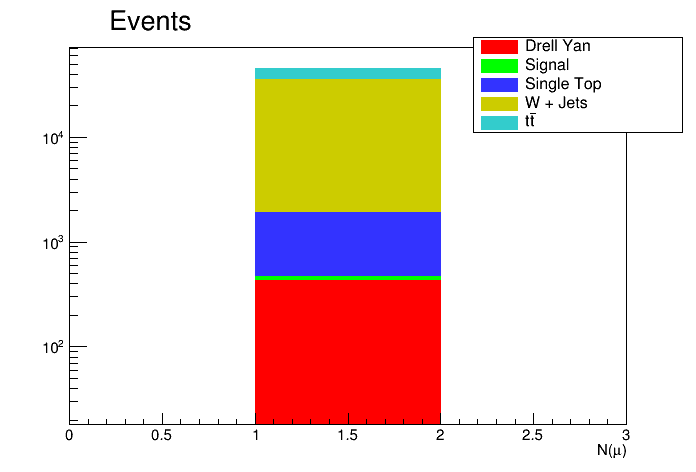

In [20]:
/*Plotting the HStack*/
Plotter1_hplots[Var1.first].first->Draw("histo");
Plotter1_hplots[Var1.first].first->GetXaxis()->SetTitle(Var1.second.c_str());
Plotter1_hplots[Var1.first].first->GetYaxis()->SetTitle("");
Plotter1_hplots[Var1.first].first->SetTitle("Events");
Plotter1_hplots[Var1.first].second->Draw(); //Legend object
c.Draw();

In [ ]:
/*Saving the plot*/
PlotName = NameMaker(Var1.first) + NameMaker(cutapplied);;
PlotPathName = PlotPath + "/" + PlotName + "_Stack.pdf";
if (SaveFiles) c.SaveAs(PlotPathName.c_str(),"pdf");
c.SaveSource(PlotPathName.c_str())

In [ ]:
gPad->SetLogy(0);

In [ ]:
//PlotPathName

In [ ]:
Plotter1_hplots[Var1.first].first->Draw("PADS,histo"); //HStack object "PADS" "nostack,e1p"
Plotter1_hplots[Var1.first].second->Draw(); //Legend object
c.Draw();

In [ ]:
/*Saving the plot*/
PlotPathName = PlotPath + "/" + PlotName + "_AllPads.pdf";
if (SaveFiles) c.SaveAs(PlotPathName.c_str(),"pdf");

In [ ]:
gPad->SetLogy(1);

In [ ]:
Plotter1_hplots[Var1.first].first->Draw("E1,nostackb"); //HStack object "PADS" "nostack,e1p"
Plotter1_hplots[Var1.first].first->GetXaxis()->SetTitle(Var1.second.c_str());
Plotter1_hplots[Var1.first].first->GetYaxis()->SetTitle("Events");
Plotter1_hplots[Var1.first].first->SetTitle("");
Plotter1_hplots[Var1.first].second->Draw(); //Legend object
c.Draw();

In [ ]:
/*Saving the plot*/
PlotPathName = PlotPath + "/" + PlotName + "_AllLog.pdf";
if (SaveFiles) c.SaveAs(PlotPathName.c_str(),"pdf");

In [ ]:
gPad->SetLogy(0);

## Significance

### Significance Less Than

In [ ]:
/*Get the histograms from the Plotter Objet*/
auto Plotter1_Hist=Plotter1->GetHists();

In [ ]:
//Vector of the TH1D Background, as
std::vector<TH1D *> BackgroundPlotter1;
std::vector<TH1D *> SignalTH1D;
for (auto i = 0; i<Plotter1_Hist[Var1.first].first.size(); i++){
    std::string s1 = (std::string) Plotter1_Hist[Var1.first].first.at(i)->GetName();
    if (s1.find("Signal") != std::string::npos) {
    //std::cout<< Plotter1_Hist[Var1.first].first.at(i)->GetName()<<std::endl;
        SignalTH1D.push_back((TH1D *)Plotter1_Hist[Var1.first].first.at(i));
    }else{
        BackgroundPlotter1.push_back((TH1D *)Plotter1_Hist[Var1.first].first.at(i));
    }
    temp[Plotter1_Hist[Var1.first].first.at(i)->GetName()] = Plotter1_Hist[Var1.first].first.at(i)->Integral();
}
if(SignalTH1D.size()>1) std::cout<< "Warnig More than one signal"

In [ ]:
//temp["STMT_LeadingMuon_MET"]

In [ ]:
CutFlow[cutapplied]=temp;

In [ ]:
Significance Plotter1_Sig(SignalTH1D.at(0),BackgroundPlotter1);
TH1D * Plotter1_SigLT=Plotter1_Sig.GetSigLessThan();

In [ ]:
Plotter1_SigLT->Draw("E1");
Plotter1_SigLT->SetTitle("");
Plotter1_SigLT->GetXaxis()->SetTitle(Var1.second.c_str());
Plotter1_SigLT->GetYaxis()->SetTitle("Z=S/#sqrt{S+B}");
c.Draw();

In [ ]:
PlotPathName = PlotPath + "/" + PlotName + "_SigLT.pdf";
if (SaveFiles) c.SaveAs(PlotPathName.c_str(),"pdf");

### Significance More Than

In [ ]:
auto Plotter1_SigMT=Plotter1_Sig.GetSigMoreThan();

In [ ]:
Plotter1_SigMT->Draw("E1");
//Plotter1_SigMT->Draw("text,same");
Plotter1_SigMT->SetTitle("");
Plotter1_SigMT->GetXaxis()->SetTitle(Var1.second.c_str());
Plotter1_SigMT->GetYaxis()->SetTitle("Z=S/#sqrt{S+B}");
c.Draw();

In [ ]:
PlotPathName = PlotPath + "/" + PlotName + "_SigMT.pdf";
if (SaveFiles) c.SaveAs(PlotPathName.c_str(),"pdf");

### General Significance

In [ ]:
auto GeneralSigPlotter1 = Plotter1_Sig.GetSignificance();
std::string YaxisTitle = "Cut > " + Var1.second;
std::string XaxisTitle = "Cut < " + Var1.second;

In [ ]:
GeneralSigPlotter1->Draw("COLZ1");
//GeneralSigPlotter1->Draw("text, same");
GeneralSigPlotter1->SetTitle("");
GeneralSigPlotter1->GetYaxis()->SetTitle(YaxisTitle.c_str());
GeneralSigPlotter1->GetXaxis()->SetTitle(XaxisTitle.c_str());
//TLatex t(3,10,"#xrightarrow{Less Than Cut}");
//t.Draw();
//gStyle->SetPalette(87);
c.Draw();

In [ ]:
PlotPathName = PlotPath + "/" + PlotName + "_SigGeneral.pdf";
if (SaveFiles) c.SaveAs(PlotPathName.c_str(),"pdf");

## efficency plots

### Less than efficency

In [ ]:
//Get The efficency plots
std::vector<TH1D *> Plotter1_EffLT = Plotter1_Sig.GetEffLessThan();

In [ ]:
//Plotter1_EffLT[0]->SetFillStyle(4050);
Plotter1_EffLT[0]->SetFillColor(0);
Plotter1_EffLT[0]->Draw("E");
Plotter1_EffLT[0]->SetTitle("");
Plotter1_EffLT[0]->GetXaxis()->SetTitle(Var1.second.c_str());
Plotter1_EffLT[0]->GetYaxis()->SetTitle("Efficiency less-than");
Plotter1_hplots[Var1.first].second->Draw(); //Legend object
//Plotter1_EffLT[1]->SetFillStyle(4050);
Plotter1_EffLT[1]->SetFillColor(0);
Plotter1_EffLT[1]->Draw("same E");
//Plotter1_EffLT[2]->SetFillStyle(4050);
Plotter1_EffLT[2]->SetFillColor(0);
Plotter1_EffLT[2]->Draw("same E");
//Plotter1_EffLT[3]->SetFillStyle(4050);
Plotter1_EffLT[3]->SetFillColor(0);
Plotter1_EffLT[3]->Draw("same E");
//Plotter1_EffLT[4]->SetFillStyle(4050);
Plotter1_EffLT[4]->SetFillColor(0);
Plotter1_EffLT[4]->Draw("same E");
c.Draw();

In [ ]:
PlotPathName = PlotPath + "/" + PlotName + "LTEff.pdf";
if (SaveFiles) c.SaveAs(PlotPathName.c_str(),"pdf");

### Efficiency More Than

In [ ]:
//Get The efficency plots
std::vector<TH1D *> Plotter1_EffMT = Plotter1_Sig.GetEffMoreThan();

In [ ]:
//Plotter1_EffMT[0]->SetFillStyle(4050);
Plotter1_EffMT[0]->SetFillColor(0);
Plotter1_EffMT[0]->Draw("E");
Plotter1_EffMT[0]->SetTitle("");
Plotter1_EffMT[0]->GetXaxis()->SetTitle(Var1.second.c_str());
Plotter1_EffMT[0]->GetYaxis()->SetTitle("Efficiency greater-than");
Plotter1_hplots[Var1.first].second->Draw(); //Legend object
//Plotter1_EffMT[1]->SetFillStyle(4050);
Plotter1_EffMT[1]->SetFillColor(0);
Plotter1_EffMT[1]->Draw("same E");
//Plotter1_EffMT[2]->SetFillStyle(4050);
Plotter1_EffMT[2]->SetFillColor(0);
Plotter1_EffMT[2]->Draw("same E");
//Plotter1_EffMT[3]->SetFillStyle(4050);
Plotter1_EffMT[3]->SetFillColor(0);
Plotter1_EffMT[3]->Draw("same E");
//Plotter1_EffMT[4]->SetFillStyle(4050);
Plotter1_EffMT[4]->SetFillColor(0);
Plotter1_EffMT[4]->Draw("same E");
c.Draw();

In [ ]:
PlotPathName = PlotPath + "/" + PlotName + "MTEff.pdf";
if (SaveFiles) c.SaveAs(PlotPathName.c_str(),"pdf");

In [ ]:
//CutFlow

In [ ]:
// Create a map iterator and point to beginning of map
std::string DataFileName = PlotPath + "/" + PlotName +"_Cutflow.dat";
// Iterate over the map using Iterator till end.
std::map<std::string, std::map<std::string, Double_t> >::iterator it = CutFlow.begin();

In [ ]:
//if (SaveFiles) ofstream myfile (FileName.c_str());
while (it != CutFlow.end())
{
    // Accessing KEY from element pointed by it.
    std::string Cut = it->first;
    std::cout<< "-------------------------------" <<std::endl;
    std::cout <<Cut <<std::endl;
    std::cout<< "-------------------------------" <<std::endl;
    //File
    /*if (SaveFiles) myfile<< "-------------------------------" <<std::endl;
    if (SaveFiles) myfile<< "-----------" <<Cut << "----------------" <<std::endl;
    if (SaveFiles) myfile<< "-------------------------------" <<std::endl;
    */
    

    // Accessing VALUE from element pointed by it.
    std::map<std::string, Double_t> map2 = it->second;
    
    // Create a map iterator and point to beginning of map
    std::map<std::string, Double_t>::iterator other = map2.begin();
    while (other != map2.end())
    {
        // Accessing KEY from element pointed by other.
        std::string sig = other->first;
        // Accessing VALUE from element pointed by it.
        int count = other->second;
        std::cout << "        " <<other->first << " ...... " << count <<std::endl;
      //  if (SaveFiles) myfile << "        " <<other->first << " ...... " << count <<std::endl;
        // Increment the Iterator to point to next entry
        other++;
            
    }
    // Increment the Iterator to point to next entry
    it++;
}
//if (SaveFiles) myfile.close();